In [17]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def check_hyperlinks(url, prefix):
    subpages = find_subpages(url, prefix)
    links_dict = dict()
    for subpage in subpages:
        try:
            response = requests.get(subpage)
            if response.status_code in links_dict:
                links_dict[response.status_code].append(subpage)
            else:
                links_dict[response.status_code] = [subpage]
            soup = BeautifulSoup(response.content, 'html.parser')
            links = soup.find_all('a')
            for link in links:
                href = link.get('href')
                if href is None:
                    continue
                try:
                    link_url = urljoin(subpage, href)
                    #if not link_url.startswith(prefix):
                    #    continue
                    link_response = requests.head(link_url)
                    status_code = link_response.status_code
                    print(f"{link_url}: {status_code}")
                    if status_code in links_dict:
                        links_dict[status_code].append(link_url)
                    else:
                        links_dict[status_code] = [link_url]
                except requests.exceptions.RequestException:
                    print(f"Error: Could not connect to {link_url}")
                    if 'N/A' in links_dict:
                        links_dict['N/A'].append(link_url)
                    else:
                        links_dict['N/A'] = [link_url]
        except requests.exceptions.RequestException:
            print(f"Error: Could not connect to {subpage}")
    return links_dict

def find_subpages(url, prefix):
    response = requests.get(url)
    print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a')
    base_url = response.url
    subpages = set()
    for link in links:
        href = link.get('href')
        if href is None:
            continue
        elif href.startswith('/'):
            subpage = urljoin(base_url, href)
            if subpage.startswith(prefix):
                subpages.add(subpage)
        elif href.startswith(base_url):
            if href.startswith(prefix):
                subpages.add(href)
    return subpages

In [18]:
url = 'https://www.gc.cuny.edu/anthropology'
prefix = 'https://www.gc.cuny.edu/anthropology'

find_subpages(url, prefix)

<Response [403]>


set()

In [4]:
links_dict = check_hyperlinks(url, prefix)
print(links_dict)
lengths = {key: len(value) for key, value in links_dict.items()}
print(lengths)
lengths_distinct = {key: len(list(set(value))) for key, value in links_dict.items()}
print(lengths_distinct)

https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information/courses#main-content: 200
https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information/courses#main-menu: 200
https://www.cuny.edu: 200
https://www.gc.cuny.edu/: 200
https://www.gc.cuny.edu/students: 200
https://www.gc.cuny.edu/faculty: 200
https://www.gc.cuny.edu/staff: 200
https://www.gc.cuny.edu/institutional-advancement/alumni: 200
https://library.gc.cuny.edu/: 200
https://www.gc.cuny.edu/people: 200
https://www.gc.cuny.edu/giving: 200
https://www.gc.cuny.edu/apply: 301
https://www.gc.cuny.edu/events?audience=34: 200
https://www.gc.cuny.edu/academics: 200
https://www.gc.cuny.edu/academics/programs?type=45: 200
https://www.gc.cuny.edu/academics/programs?type=44: 200
https://www.gc.cuny.edu/academics/programs?type=83: 200
https://www.gc.cuny.edu/academics/collaborative-and-interdisciplinary-programs: 200
https://www.gc.cuny.edu/academics/continuing-education: 200
https://www.gc.cuny.edu/academics

In [5]:
print(links_dict[404])

['https://www.gc.cuny.edu/siites/default/files/2021-10/data_mining%20%281%29.pdf', 'http://www.ezirim.com/', 'http://visionlab.engr.ccny.cuny.edu/%7Ekhoo/', 'http://latlab.cs.qc.cuny.edu/pengfei/', 'http://visionlab.engr.ccny.cuny.edu/%7Etao/']


In [6]:
print(list(set(links_dict['N/A'])))

['http://csweb.gc.cuny.edu/~sluo2', 'tel:+1-212-817-7000', 'http://www.nooreddin.com/', 'http://web.cs.gc.cuny.edu/%7Eyfeng/', 'mailto:dkaterenchuk@gc.cuny.edu', 'http://web.cs.gc.cuny.edu/%7Eiicke/', 'https://zicklin.baruch.cuny.edu/faculty-research/academic-departments/information-technology-statistics/information-systems-statistics-programs/', 'http://web.cs.gc.cuny.edu/%7Etang/', 'https://home.cunyfirst.cuny.edu/psp/cnyepprd/GUEST/HRMS/c/HRS_HRAM.HRS_CE.GBL?FolderPath=PORTAL_ROOT_OBJECT.HC_HRS_CE_GBL2&IsFolder=false&IgnoreParamTempl=FolderPath%252cIsFolder', 'http://welike2draw.com/samwell/', 'mailto:paul.cesaretti@gmail.com', 'mailto:jgryak@gradcenter.cuny.edu', 'http://www.alikoc.name/', 'http://www.lmelo.org/', 'http://web.cs.gc.cuny.edu/%7Ecbaskent/', 'mailto:jhanon1@gradcenter.cuny.edu', 'http://web.cs.gc.cuny.edu/%7Etligorio/', 'mailto:aachilleos@gc.cuny.edu', 'mailto:xnf1203@gmail.com', 'mailto:satari@farishta.me', 'mailto:azelener@gradcenter.cuny.edu', 'http://web.cs.gc.cun

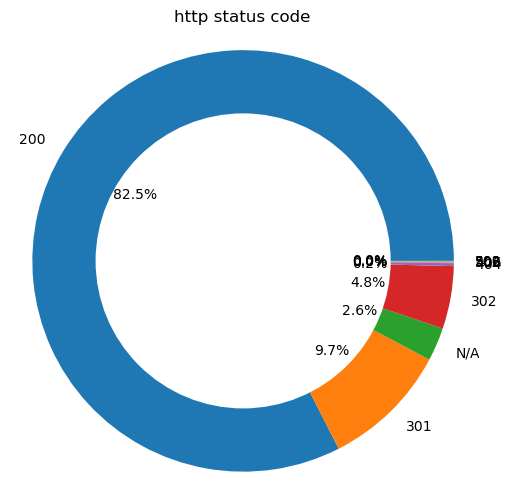

In [8]:
import matplotlib.pyplot as plt

labels = list(lengths.keys())
values = list(lengths.values())

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('http status code')
plt.show()


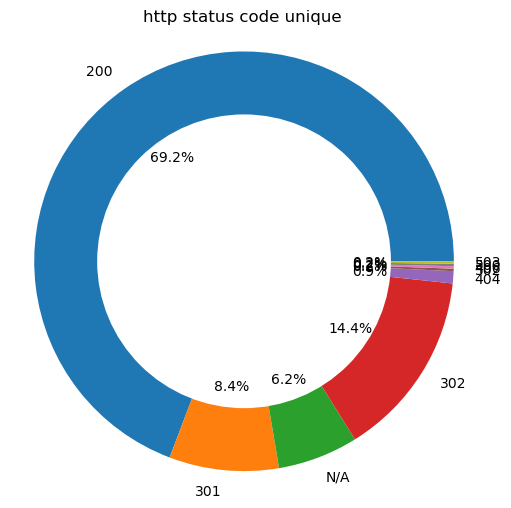

In [10]:
import matplotlib.pyplot as plt

labels = list(lengths_distinct.keys())
values = list(lengths_distinct.values())

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('http status code unique')
plt.show()


In [14]:
links_dict = check_hyperlinks(url, prefix)
print(links_dict)
lengths = {key: len(value) for key, value in links_dict.items()}
print(lengths)
lengths_distinct = {key: len(list(set(value))) for key, value in links_dict.items()}
print(lengths_distinct)

Error: Could not connect to https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information
Error: Could not connect to https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information/course-syllabuses
Error: Could not connect to https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information/courses
Error: Could not connect to https://www.gc.cuny.edu/computer-science/admissions-and-aid
Error: Could not connect to https://www.gc.cuny.edu/computer-science/research-areas
Error: Could not connect to https://www.gc.cuny.edu/computer-science/faculty-and-committees
Error: Could not connect to https://www.gc.cuny.edu/computer-science/student-resources
Error: Could not connect to https://www.gc.cuny.edu/computer-science/student-resources/thesis-room-reservations
Error: Could not connect to https://www.gc.cuny.edu/computer-science/news-and-events
Error: Could not connect to https://www.gc.cuny.edu/computer-science/news-and-events/submit-your-news
Error: Could no

In [27]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def check_hyperlinks(url, prefix):
    subpages = find_subpages(url, prefix)
    links_dict = dict()
    for subpage in subpages:
        try:
            response = requests.get(subpage)
            if response.status_code in links_dict:
                links_dict[response.status_code].append(subpage)
            else:
                links_dict[response.status_code] = [subpage]
            soup = BeautifulSoup(response.content, 'html.parser')
            links = soup.find_all('a')
            for link in links:
                href = link.get('href')
                if href is None:
                    continue
                try:
                    link_url = urljoin(subpage, href)
                    if not link_url.startswith(prefix):
                        continue
                    link_response = requests.head(link_url)
                    status_code = link_response.status_code
                    print(f"{link_url}: {status_code}")
                    if status_code in links_dict:
                        links_dict[status_code].append(link_url)
                    else:
                        links_dict[status_code] = [link_url]
                except requests.exceptions.RequestException:
                    print(f"Error: Could not connect to {link_url}")
                    if 'N/A' in links_dict:
                        links_dict['N/A'].append(link_url)
                    else:
                        links_dict['N/A'] = [link_url]
        except requests.exceptions.RequestException:
            print(f"Error: Could not connect to {subpage}")
    return links_dict

def find_subpages(url, prefix):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a')
    base_url = response.url
    subpages = set()
    for link in links:
        href = link.get('href')
        if href is None:
            continue
        elif href.startswith('/'):
            subpage = urljoin(base_url, href)
            if subpage.startswith(prefix):
                subpages.add(subpage)
        elif href.startswith(base_url):
            if href.startswith(prefix):
                subpages.add(href)
    return subpages

In [28]:
url = 'https://www.gc.cuny.edu/computer-science'
prefix = 'https://www.gc.cuny.edu/computer-science'

find_subpages(url, prefix)

set()

In [3]:
links_dict = check_hyperlinks(url, prefix)
print(links_dict)
lengths = {key: len(value) for key, value in links_dict.items()}
print(lengths)
lengths_distinct = {key: len(list(set(value))) for key, value in links_dict.items()}
print(lengths_distinct)

https://www.gc.cuny.edu/computer-science/student-resources#main-content: 200
https://www.gc.cuny.edu/computer-science/student-resources#main-menu: 200
https://www.gc.cuny.edu/computer-science: 200
https://www.gc.cuny.edu/computer-science: 200
https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information: 200
https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information/course-syllabuses: 200
https://www.gc.cuny.edu/computer-science/curriculum-and-degree-information/courses: 200
https://www.gc.cuny.edu/computer-science/admissions-and-aid: 200
https://www.gc.cuny.edu/computer-science/research-areas: 200
https://www.gc.cuny.edu/computer-science/faculty-and-committees: 200
https://www.gc.cuny.edu/computer-science/student-resources: 200
https://www.gc.cuny.edu/computer-science/student-resources/thesis-room-reservations: 200
https://www.gc.cuny.edu/computer-science/news-and-events: 200
https://www.gc.cuny.edu/computer-science/news-and-events/submit-your-news: 200
ht

In [14]:
import ping3

hostname = "www.google.com"

response_time = ping3.ping(hostname)

if response_time is not None:
    print(f"Response time for {hostname}: {response_time} ms")
else:
    print(f"Ping failed for {hostname}")


ModuleNotFoundError: No module named 'ping3'

In [13]:
pip install ping3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def ping(url):
    #dns.resolver.Cache.flush()  
    response = requests.get(url)
    return response.elapsed.total_seconds()

def check_hyperlinks(url, prefix):
    subpage_set = find_subpages(url, prefix)
    links_dict = dict()
    for subpage in subpage_set:
        try:
            #dns.resolver.Cache.flush()  
            response = requests.get(subpage)
            if response.status_code in links_dict:
                links_dict[response.status_code].append(subpage)
            else:
                links_dict[response.status_code] = [subpage]
            soup = BeautifulSoup(response.content, 'html.parser')
            links = soup.find_all('a')
            for link in links:
                href = link.get('href')
                if href is None:
                    continue
                try:
                    link_url = urljoin(subpage, href)
                    #if not link_url.startswith(prefix):
                    #    continue
                    link_response_time = ping(link_url)
                    print(f"{link_url}: {link_response_time} seconds")
                    if link_response_time in links_dict:
                        links_dict[link_response_time].append(link_url)
                    else:
                        links_dict[link_response_time] = [link_url]
                except requests.exceptions.RequestException:
                    print(f"Error: Could not connect to {link_url}")
                    if 'N/A' in links_dict:
                        links_dict['N/A'].append(link_url)
                    else:
                        links_dict['N/A'] = [link_url]
        except requests.exceptions.RequestException:
            print(f"Error: Could not connect to {subpage}")
    return links_dict

def find_subpages(url, prefix):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a')
    base_url = response.url
    subpages = set()
    for link in links:
        href = link.get('href')
        if href is None:
            continue
        elif href.startswith('/'):
            subpage = urljoin(base_url, href)
            if subpage.startswith(prefix):
                subpages.add(subpage)
        elif href.startswith(base_url):
            if href.startswith(prefix):
                subpages.add(href)
    return subpages


In [2]:
url = 'https://www.gc.cuny.edu'
prefix = 'https://www.gc.cuny.edu'

pingdict = check_hyperlinks(url, prefix)

https://www.gc.cuny.edu/students#main-content: 0.019525 seconds
https://www.gc.cuny.edu/students#main-menu: 0.019602 seconds
https://www.cuny.edu: 0.051346 seconds
https://www.gc.cuny.edu/: 0.017834 seconds
https://www.gc.cuny.edu/students: 0.020837 seconds
https://www.gc.cuny.edu/faculty: 0.024081 seconds
https://www.gc.cuny.edu/staff: 0.054356 seconds
https://www.gc.cuny.edu/institutional-advancement/alumni: 0.070808 seconds
https://library.gc.cuny.edu/: 0.02647 seconds
https://www.gc.cuny.edu/people: 0.070802 seconds
https://www.gc.cuny.edu/giving: 0.060122 seconds
https://www.gc.cuny.edu/apply: 0.005195 seconds
https://www.gc.cuny.edu/events?audience=34: 0.091418 seconds
https://www.gc.cuny.edu/academics: 0.057384 seconds
https://www.gc.cuny.edu/academics/programs?type=45: 0.058012 seconds
https://www.gc.cuny.edu/academics/programs?type=44: 0.057036 seconds
https://www.gc.cuny.edu/academics/programs?type=83: 0.058409 seconds
https://www.gc.cuny.edu/academics/collaborative-and-inter

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

values = list(pingdict.values())

plt.hist(values, bins=10)
plt.xlabel('Ping Time (in ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Ping Times')
plt.show()


Task was destroyed but it is pending!
task: <Task pending name='Task-1' coro=<Kernel.poll_control_queue() running at /home/hub/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py:279> wait_for=<Future finished result=<Future at 0x...state=pending>> cb=[_chain_future.<locals>._call_set_state() at /home/hub/anaconda3/lib/python3.9/asyncio/futures.py:391]>


In [ ]:
pingdict

In [6]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
#import dns.resolver

def ping(url):
    #dns.resolver.Cache.flush()  
    response = requests.get(url)
    return response.elapsed.total_seconds()

def check_hyperlinks(url, prefix):
    subpage_set = find_subpages(url, prefix)
    links_dict = dict()
    for subpage in subpage_set:
        try:
            #dns.resolver.Cache.flush()  
            response = requests.get(subpage)
            if response.status_code in links_dict:
                links_dict[response.status_code].append(subpage)
            else:
                links_dict[response.status_code] = [subpage]
            soup = BeautifulSoup(response.content, 'html.parser')
            links = soup.find_all('a')
            for link in links:
                href = link.get('href')
                if href is None:
                    continue
                try:
                    link_url = urljoin(subpage, href)
                    #if not link_url.startswith(prefix):
                    #    continue
                    link_response_time = ping(link_url)
                    print(f"{link_url}: {link_response_time} seconds")
                    if link_response_time in links_dict:
                        links_dict[link_response_time].append(link_url)
                    else:
                        links_dict[link_response_time] = [link_url]
                except requests.exceptions.RequestException:
                    print(f"Error: Could not connect to {link_url}")
                    if 'N/A' in links_dict:
                        links_dict['N/A'].append(link_url)
                    else:
                        links_dict['N/A'] = [link_url]
        except requests.exceptions.RequestException:
            print(f"Error: Could not connect to {subpage}")
    return links_dict

def find_subpages(url, prefix):
    #dns.resolver.Cache.flush()  # Clear dns cache
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a')
    base_url = response.url
    subpages = set()
    for link in links:
        href = link.get('href')
        if href is None:
            continue
        elif href.startswith('/'):
            subpage = urljoin(base_url, href)
            if subpage.startswith(prefix):
                subpages.add(subpage)
        elif href.startswith(base_url):
            if href.startswith(prefix):
                subpages.add(href)
    return subpages


In [5]:
pip install dnspython


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 6.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
url = 'https://www.gc.cuny.edu'
prefix = 'https://www.gc.cuny.edu'

pingdict = check_hyperlinks(url, prefix)

TypeError: flush() missing 1 required positional argument: 'self'

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time

def download_time(url):
    start_time = time.time()
    response = requests.get(url)
    end_time = time.time()
    return end_time - start_time

def check_hyperlinks(url, prefix):
    subpage_set = find_subpages(url, prefix)
    links_dict = dict()
    for subpage in subpage_set:
        try:
            response_time = download_time(subpage)
            if response_time in links_dict:
                links_dict[response_time].append(subpage)
            else:
                links_dict[response_time] = [subpage]
            soup = BeautifulSoup(response.content, 'html.parser')
            links = soup.find_all('a')
            for link in links:
                href = link.get('href')
                if href is None:
                    continue
                try:
                    link_url = urljoin(subpage, href)
                    if not link_url.startswith(prefix):
                        continue
                    link_response_time = download_time(link_url)
                    print(f"{link_url}: {link_response_time} seconds")
                    if link_response_time in links_dict:
                        links_dict[link_response_time].append(link_url)
                    else:
                        links_dict[link_response_time] = [link_url]
                except requests.exceptions.RequestException:
                    print(f"Error: Could not connect to {link_url}")
                    if 'N/A' in links_dict:
                        links_dict['N/A'].append(link_url)
                    else:
                        links_dict['N/A'] = [link_url]
        except requests.exceptions.RequestException:
            print(f"Error: Could not connect to {subpage}")
    return links_dict

def find_subpages(url, prefix):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a')
    base_url = response.url
    subpages = set()
    for link in links:
        href = link.get('href')
        if href is None:
            continue
        elif href.startswith('/'):
            subpage = urljoin(base_url, href)
            if subpage.startswith(prefix):
                subpages.add(subpage)
        elif href.startswith(base_url):
            if href.startswith(prefix):
                subpages.add(href)
    return subpages


In [ ]:
url = 'https://assets.openstax.org/oscms-prodcms/media/documents/IntroductoryStatistics-OP_i6tAI7e.pdf'
prefix = 'https://www.gc.cuny.edu'

download_time(url)